In [1]:
%%capture
%run 00_Dataset.ipynb
%run 01_Data_Preparation.ipynb

(273,)

## Gaussian Process Regressor

In [4]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C, RationalQuadratic, ExpSineSquared, DotProduct, Sum

np.random.seed(1)

def f(x):
    """The function to predict."""
    return x * np.sin(x)

# ----------------------------------------------------------------------
#  First the noiseless case
X = z[:, None] #np.atleast_2d(np.linspace(0,4,1000)).T

# Observations
y = mu #f(X).ravel()

# Mesh the input space for evaluations of the real function, the prediction and
# its MSE
x = np.atleast_2d(np.linspace(0, 8.5, 1000)).T

# Instantiate a Gaussian Process model
kernel = DotProduct() + RBF(10., (1e-2, 1e2))

gp = GaussianProcessRegressor(kernel=kernel, alpha=0.3, normalize_y=True)#, n_restarts_optimizer=9)

# Fit to data using Maximum Likelihood Estimation of the parameters
gp.fit(X, y)

# Make the prediction on the meshed x-axis (ask for MSE as well)
y_pred, sigma = gp.predict(x, return_std=True)

/tmp/ipykernel_576802/1223487541.py:12: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X = z[:, None] #np.atleast_2d(np.linspace(0,4,1000)).T


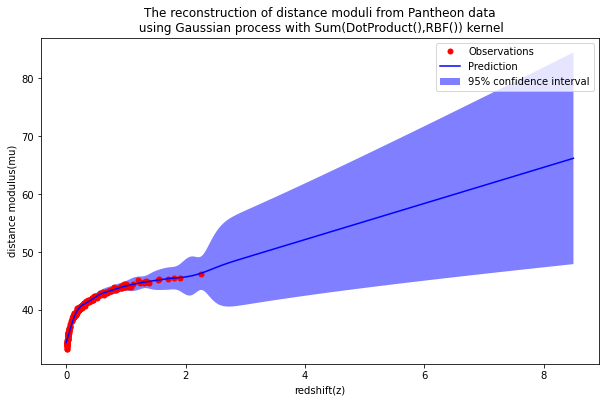

In [6]:
plt.figure(figsize=(10,6))
#plt.plot(x, f(x), 'r:', label=r'$f(x) = x\,\sin(x)$')
plt.plot(X, y, 'r.', markersize=10, label='Observations')
plt.plot(x, y_pred, 'b-', label='Prediction')
plt.fill(np.concatenate([x, x[::-1]]),
         np.concatenate([y_pred - 1.9600 * sigma,
                        (y_pred + 1.9600 * sigma)[::-1]]),
         alpha=.5, fc='b', ec='None', label='95% confidence interval')
plt.xlabel('redshift(z)')
plt.ylabel('distance modulus(mu)')
plt.title('The reconstruction of distance moduli from '+dataset+' data\n using Gaussian process with Sum(DotProduct(),RBF()) kernel')
plt.legend()

plt.savefig(os.path.join(out_dir,'03_Reconstruction_GP.png'))

plt.show()

/tmp/ipykernel_576802/999448447.py:12: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X = z[:, None] #np.atleast_2d(np.linspace(0,4,1000)).T


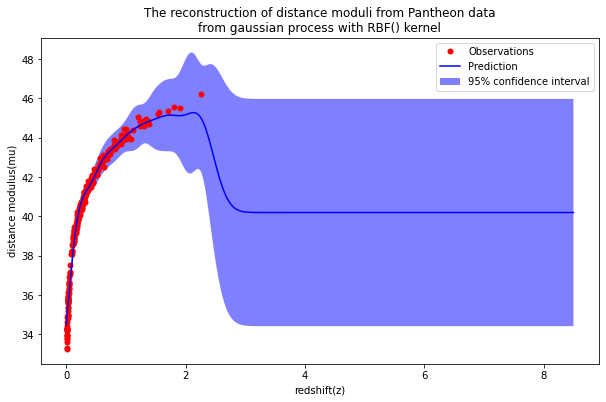

In [7]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C, RationalQuadratic, ExpSineSquared, DotProduct

np.random.seed(1)

def f(x):
    """The function to predict."""
    return x * np.sin(x)

# ----------------------------------------------------------------------
#  First the noiseless case
X = z[:, None] #np.atleast_2d(np.linspace(0,4,1000)).T

# Observations
y = mu #f(X).ravel()

# Mesh the input space for evaluations of the real function, the prediction and
# its MSE
x = np.atleast_2d(np.linspace(0, 8.5, 1000)).T

# Instantiate a Gaussian Process model
kernel = RBF(10., (1e-2, 1e2))

gp = GaussianProcessRegressor(kernel=kernel, alpha=0.3, normalize_y=True)#, n_restarts_optimizer=9)

# Fit to data using Maximum Likelihood Estimation of the parameters
gp.fit(X, y)

# Make the prediction on the meshed x-axis (ask for MSE as well)
y_pred, sigma = gp.predict(x, return_std=True)

# Plot the function, the prediction and the 95% confidence interval based on
# the MSE
plt.figure(figsize=(10,6))
#plt.plot(x, f(x), 'r:', label=r'$f(x) = x\,\sin(x)$')
plt.plot(X, y, 'r.', markersize=10, label='Observations')
plt.plot(x, y_pred, 'b-', label='Prediction')
plt.fill(np.concatenate([x, x[::-1]]),
         np.concatenate([y_pred - 1.9600 * sigma,
                        (y_pred + 1.9600 * sigma)[::-1]]),
         alpha=.5, fc='b', ec='None', label='95% confidence interval')
plt.xlabel('redshift(z)')
plt.ylabel('distance modulus(mu)')
plt.title('The reconstruction of distance moduli from '+dataset+' data\nfrom gaussian process with RBF() kernel')
plt.legend()

plt.savefig(os.path.join(out_dir,'04_Reconstruction_GP.png'))

plt.show()